In [1]:
%matplotlib inline
#import deepdish as dd
from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 

In [2]:
nyt4=np.load("NYT4-seed4-states.npy")
igba=np.load("iss_gatsby_bond_archology-long-seed4-states.npy")
print(nyt4.shape)
print(igba.shape)

(278, 100)
(629, 100)


In [29]:
# 2 set up the segmentation HMM
ev1 = brainiak.eventseg.event.EventSegment(4)
ev1.fit(nyt4)



EventSegment(event_chains=array([0., 0., 0., 0., 0.]), n_events=5)

In [30]:

ev2 = brainiak.eventseg.event.EventSegment(5)
ev2.fit(igba)

EventSegment(event_chains=array([0., 0., 0., 0., 0.]), n_events=5)

reservoir bounds:  [ 23  79 146 197]
reservoir ground:  62 136 196
reservoir bounds:  [ 91 352 479 560]
reservoir ground:  349 464 557


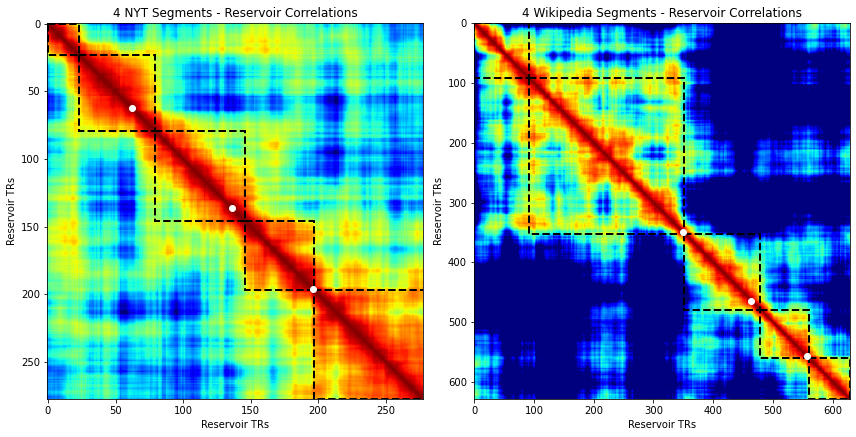

In [31]:
fig=plt.figure(figsize=(12,8))


plt.subplot(1,2,1)
color='jet'
edge='black'
scale1=0.825
scale2=0.9
nTR=278

#Ground (62 136 196) 
plt.plot(62,62,'wo') 
plt.plot(136,136,'wo') 
plt.plot(196,196,'wo')

plt.imshow(np.corrcoef(nyt4),vmin=scale1, cmap=color)

bounds = np.where(np.diff(np.argmax(ev1.segments_[0], axis=1)))[0]
ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=2,linestyle='--', edgecolor=edge,facecolor='none')
    ax.add_patch(rect)
    
print('reservoir bounds: ',bounds)
print('reservoir ground:  62 136 196')
    
    
plt.title('4 NYT Segments - Reservoir Correlations')
plt.xlabel('Reservoir TRs')
plt.ylabel('Reservoir TRs')

 



# for IGBA

plt.subplot(1,2,2)
color='jet'
#color='gist_rainbow'
edge='black'
scale1=0.825
scale2=0.9
nTR=629

#ground  68 349 464 557

plt.plot(349,349,'wo') 
plt.plot(464,464,'wo') 
plt.plot(557,557,'wo') 

plt.imshow(np.corrcoef(igba),vmin=scale1, cmap=color)

bounds = np.where(np.diff(np.argmax(ev2.segments_[0], axis=1)))[0]
ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=2,linestyle='--', edgecolor=edge,facecolor='none')
    ax.add_patch(rect)
    
plt.title('4 Wikipedia Segments - Reservoir Correlations')

plt.xlabel('Reservoir TRs')
plt.ylabel('Reservoir TRs')
print('reservoir bounds: ',bounds)
print('reservoir ground:  349 464 557')







fig.tight_layout()
plt.savefig('HMM_NYT4-IGBA-seg-2panels.png', dpi=600)


In [45]:
ev1 = brainiak.eventseg.event.EventSegment(5)
ev1.fit(nyt4)
bounds1 = np.where(np.diff(np.argmax(ev1.segments_[0], axis=1)))[0]

ev2 = brainiak.eventseg.event.EventSegment(5)
ev2.fit(igba)
bounds2 = np.where(np.diff(np.argmax(ev2.segments_[0], axis=1)))[0]


In [46]:
print(bounds1)
bounds1norm = (bounds1/278)*629
print(bounds1norm)
print(bounds2)

[ 23  79 146 197]
[ 52.03956835 178.74460432 330.3381295  445.73021583]
[ 91 352 479 560]


In [50]:

stats.ttest_rel(bounds1norm, bounds2)

Ttest_relResult(statistic=-4.0640099200566375, pvalue=0.026866309686806002)

In [51]:
#reservoir bounds:  [ 77 146 197]
#reservoir ground:  62 136 196
#reservoir bounds:  [ 91 352 479 560]
#reservoir ground:  349 464 557

ground = [62, 136, 196, 349, 464, 557]
permuted_ground = [62, 136, 196, 349, 464, 557]


reservoir = [77, 146, 197, 352, 479, 560]


correlation, p_value = stats.pearsonr(permuted_ground, reservoir)
print('permuted correltion: ',correlation)
print('permuted p_value: ', p_value)

correlation, p_value = stats.pearsonr(ground, reservoir)
print('correltion: ',correlation)
print('p_value: ', p_value)

permuted correltion:  0.08834860763237089
permuted p_value:  0.8678218900404852
correltion:  0.9994998294768106
p_value:  3.751932644333341e-07
